In [1]:
import os
import sv as SV
import numpy as np
import astropy.table as atable

from desitarget.sv1.sv1_targetmask import bgs_mask as sv1_bgs_mask
from desitarget.sv3.sv3_targetmask import bgs_mask as sv3_bgs_mask

In [2]:
# -- plotting -- 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [3]:
# load compiled zsuccess rates to file
#dat_dir = '/global/cscratch1/sd/chahah/bgs-cmxsv/sv-paper/'
#dat_dir = '/global/cscratch1/sd/mjwilson/desi/BGS/bgs-cmxsv/'
dat_dir = '/Users/chahah/data/bgs_cmxsv/sv_paper/'


sv1_gals = atable.Table.read(os.path.join(dat_dir, 'sv1.bgs_exps.efftime160_200.zsuccess.v4.fits'))
sv3_gals = atable.Table.read(os.path.join(dat_dir, 'sv3.bgs_exps.efftime160_200.zsuccess.v4.fits'))
main_gals = atable.Table.read(os.path.join(dat_dir, 'main.bgs_exps.efftime160_200.zsuccess.v3.fits'))

In [4]:
sv1_deep  = (sv1_gals['DEEP_EXPTIME'] > 2000) 
sv3_deep  = np.isin(sv3_gals['PRIORITY'].data, np.array([102100, 102000])) & (sv3_gals['EFFTIME_TSNR2_BGS'] > 100)

np.mean(sv1_deep), np.mean(sv3_deep)

(0.9415918811048426, 0.600423039534168)

In [5]:
# catastrophic redshift errors based on deep as truth table
sv1_catasto = np.abs(sv1_gals['RR_Z'] - sv1_gals['RR_Z_DEEP'])/(1 + sv1_gals['RR_Z_DEEP']) > 0.003
sv3_catasto = np.abs(sv3_gals['RR_Z'] - sv3_gals['RR_Z_DEEP'])/(1 + sv3_gals['RR_Z_DEEP']) > 0.003

In [6]:
sv1_brgt = (sv1_gals['SV1_BGS_TARGET'] & sv1_bgs_mask['BGS_BRIGHT']) != 0 
sv1_lowq = (sv1_gals['SV1_BGS_TARGET'] & sv1_bgs_mask['BGS_LOWQ']) != 0 
sv1_fain = (sv1_gals['SV1_BGS_TARGET'] & sv1_bgs_mask['BGS_FAINT']) != 0

sv3_brgt = (sv3_gals['SV3_BGS_TARGET'] & sv3_bgs_mask['BGS_BRIGHT']) != 0 
sv3_fain = (sv3_gals['SV3_BGS_TARGET'] & sv3_bgs_mask['BGS_FAINT']) != 0 

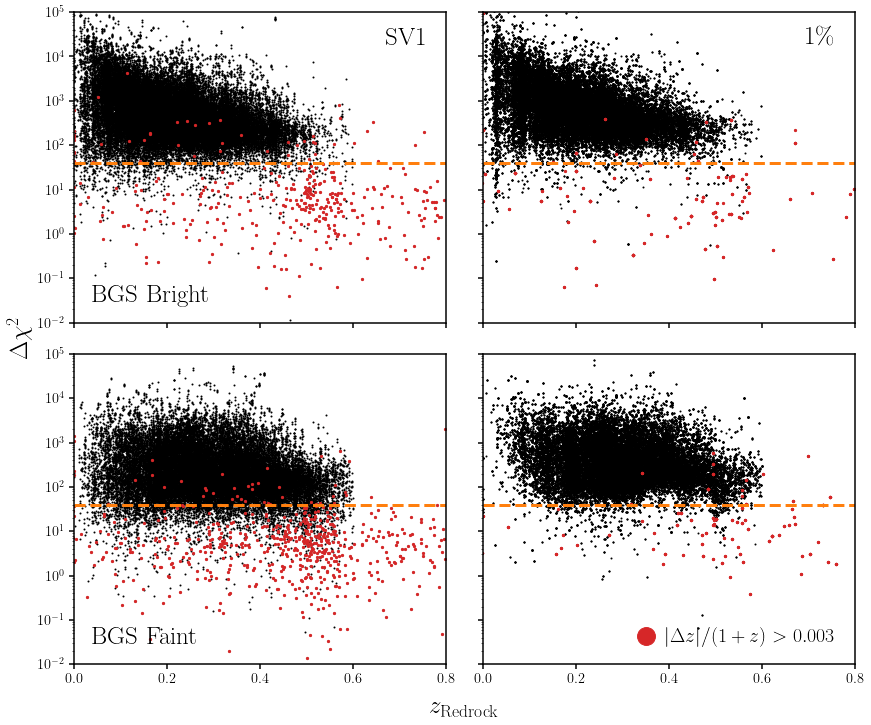

In [8]:
fig = plt.figure(figsize=(14,12))
sub = fig.add_subplot(221)
sub.scatter(sv1_gals['RR_Z'][sv1_brgt & sv1_deep], sv1_gals['RR_DELTACHI2'][sv1_brgt & sv1_deep], c='k', s=1, rasterized=True)
sub.scatter(sv1_gals['RR_Z'][sv1_brgt & sv1_deep & sv1_catasto], sv1_gals['RR_DELTACHI2'][sv1_brgt & sv1_deep & sv1_catasto], c='C3', s=5, rasterized=True)
sub.axhline(40, color='C1', linestyle='--', linewidth=3)
sub.text(0.05, 0.05, r'BGS Bright', ha='left', va='bottom', transform=sub.transAxes, fontsize=25)
sub.text(0.95, 0.95, r'SV1', ha='right', va='top', transform=sub.transAxes, fontsize=25)

sub.set_xlim(0.0, 0.8)
sub.set_xticks([0., 0.2, 0.4, 0.6, 0.8])
sub.set_xticklabels([])
sub.set_yscale('log')
sub.set_ylim(1e-2, 1e5)

sub = fig.add_subplot(222)
sub.scatter(sv3_gals['RR_Z'][sv3_brgt & sv3_deep], sv3_gals['RR_DELTACHI2'][sv3_brgt & sv3_deep], c='k', s=1, label='BGS Bright', rasterized=True)
sub.scatter(sv3_gals['RR_Z'][sv3_brgt & sv3_deep & sv3_catasto], sv3_gals['RR_DELTACHI2'][sv3_brgt & sv3_deep & sv3_catasto], c='C3', s=5, label=r'$|\Delta z|/z > 0.003$', rasterized=True)
sub.axhline(40, color='C1', linestyle='--', linewidth=3)
sub.text(0.95, 0.95, r'1\%', ha='right', va='top', transform=sub.transAxes, fontsize=25)

sub.set_xlim(0.0, 0.8)
sub.set_xticks([0., 0.2, 0.4, 0.6, 0.8])
sub.set_xticklabels([])
sub.set_yscale('log')
sub.set_yticklabels([])
sub.set_ylim(1e-2, 1e5)


sub = fig.add_subplot(223)
sub.scatter(sv1_gals['RR_Z'][sv1_fain & sv1_deep], sv1_gals['RR_DELTACHI2'][sv1_fain & sv1_deep], c='k', s=1, rasterized=True)
sub.scatter(sv1_gals['RR_Z'][sv1_fain & sv1_deep & sv1_catasto], sv1_gals['RR_DELTACHI2'][sv1_fain & sv1_deep & sv1_catasto], c='C3', s=5, rasterized=True)
sub.axhline(40, color='C1', linestyle='--', linewidth=3)
sub.text(0.05, 0.05, r'BGS Faint', ha='left', va='bottom', transform=sub.transAxes, fontsize=25)

sub.set_xlim(0.0, 0.8)
sub.set_xticks([0., 0.2, 0.4, 0.6, 0.8])
sub.set_yscale('log')
sub.set_ylim(1e-2, 1e5)

sub = fig.add_subplot(224)
sub.scatter(sv3_gals['RR_Z'][sv3_fain & sv3_deep], sv3_gals['RR_DELTACHI2'][sv3_fain & sv3_deep], c='k', s=1, rasterized=True)
sub.scatter(sv3_gals['RR_Z'][sv3_fain & sv3_deep & sv3_catasto], sv3_gals['RR_DELTACHI2'][sv3_fain & sv3_deep & sv3_catasto], c='C3', s=5, label=r'$|\Delta z|/(1+z) > 0.003$', rasterized=True)
sub.axhline(40, color='C1', linestyle='--', linewidth=3)
sub.legend(loc='lower right', fontsize=20, handletextpad=0., markerscale=8)
sub.set_xlim(0.0, 0.8)
sub.set_xticks([0., 0.2, 0.4, 0.6, 0.8])
sub.set_yscale('log')
sub.set_yticklabels([])
sub.set_ylim(1e-2, 1e5)

bkgd = fig.add_subplot(111, frameon=False)
bkgd.set_xlabel(r'$z_{\rm Redrock}$', labelpad=10, fontsize=25) 
bkgd.set_ylabel(r'$\Delta \chi^2$', labelpad=15, fontsize=25)
bkgd.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

fig.subplots_adjust(wspace=0.1, hspace=0.1)
fig.savefig('figs/dchi2_z.pdf', bbox_inches='tight')

In [9]:
def zsuccess_dchi2(gals, dchi2): 
    crit_zwarn = (gals['RR_ZWARN'] == 0)
    crit_dchi2 = (gals['DELTACHI2'] > dchi2)
    crit_stype = (gals['SPECTYPE'] != 'STAR') & (gals['SPECTYPE'] != "QSO")
    crit_z_lim = (gals['Z'] > 0.0)
    crit_z_err = (gals['ZERR'] < (0.0005 * (1. + gals['Z'])))
    
    dz_1pz     = np.abs(gals['Z_TRUE'] - gals['Z']) / (1. + gals['Z_TRUE'])
    crit_ztrue = (dz_1pz < 0.003)
    # combine all criteria
    zsuccess   = (crit_zwarn & crit_dchi2 & crit_stype & crit_z_lim & crit_z_err
                  & crit_ztrue & gals['DEEP_TRUE'])
    return zsuccess

In [10]:
dchi2_arr = np.array(list(np.arange(10, 105, 5)) + [200])
zsucc_sv3_bright_arr = np.array([np.sum(zsuccess_dchi2(sv3_gals[sv3_brgt], dchi)) / np.sum(sv3_gals['DELTACHI2'][sv3_brgt] > dchi) for dchi in dchi2_arr])
zsucc_sv3_faint_arr = np.array([np.sum(zsuccess_dchi2(sv3_gals[sv3_fain], dchi)) / np.sum(sv3_gals['DELTACHI2'][sv3_fain] > dchi) for dchi in dchi2_arr])

In [11]:
zincl_sv3_bright_arr = np.array([np.sum(zsuccess_dchi2(sv3_gals[sv3_brgt], dchi)) / np.sum(zsuccess_dchi2(sv3_gals[sv3_brgt], 0)) for dchi in dchi2_arr])
zincl_sv3_faint_arr = np.array([np.sum(zsuccess_dchi2(sv3_gals[sv3_fain], dchi)) / np.sum(zsuccess_dchi2(sv3_gals[sv3_fain], 0)) for dchi in dchi2_arr])

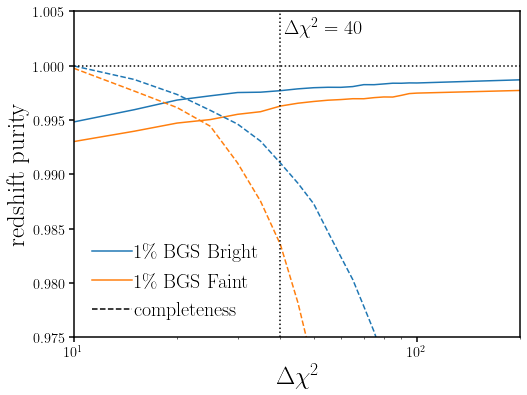

In [12]:
fig = plt.figure(figsize=(8,6))
sub = fig.add_subplot(111)

sub.plot(dchi2_arr, zsucc_sv3_bright_arr, c='C0', label=r'$1\%$ BGS Bright')
sub.plot(dchi2_arr, zsucc_sv3_faint_arr, c='C1', label=r'$1\%$ BGS Faint')

sub.plot(dchi2_arr, zincl_sv3_bright_arr, c='C0', ls='--')
sub.plot(dchi2_arr, zincl_sv3_faint_arr, c='C1', ls='--')
sub.plot([], [], c='k', ls='--', label=r'completeness')

sub.axvline(40, color='k', linestyle=':')
sub.axhline(1., color='k', linestyle=':')
sub.text(41, 1.003, r'$\Delta \chi^2 = 40$', fontsize=20)# rotation=90)

sub.legend(loc='lower left', handletextpad=0.1, fontsize=20)
sub.set_xlabel(r'$\Delta \chi^2$', fontsize=25)
sub.set_xlim(10, 200)
sub.set_xscale('log')
sub.set_ylabel('redshift purity', fontsize=25)
sub.set_ylim(0.975, 1.005)
fig.savefig('figs/dchi2_zsuccess.pdf', bbox_inches='tight')